# Checking Baseline with AutoML

In [1]:
%config InlineBackend.figure_format='retina'
import logging
import warnings
from ekorpkit import eKonf

logging.basicConfig(level=logging.INFO)
warnings.filterwarnings('ignore')
print(eKonf.__version__)

0.1.33+1.g5713996.dirty


In [2]:
data_dir = "../data/fomc"

## Load a feature set

In [3]:
fs_cfg = eKonf.compose(config_group="dataset=feature")
fs_cfg.name = "fomc_features_small"
fs_cfg.data_dir = data_dir
fs_fomc = eKonf.instantiate(fs_cfg)

INFO:ekorpkit.datasets.base:Loaded info file: ../data/fomc/fomc_features_small/info-fomc_features_small.yaml
INFO:ekorpkit.io.file:Processing [1] files from ['fomc_features_small-train.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_features_small/fomc_features_small-train.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_features_small/fomc_features_small-train.parquet
INFO:ekorpkit.info.column:index: index, index of data: index, columns: ['date', 'target', 'prev_decision', 'GDP_diff_prev', 'PMI', 'EMP_diff_prev', 'RSALES_diff_year', 'UNEMP_diff_prev', 'HSALES_diff_year', 'Inertia_diff', 'Balanced_diff', 'split'], id: ['date', 'split']
INFO:ekorpkit.info.column:Added a column [split] with value [train]
INFO:ekorpkit.io.file:Processing [1] files from ['fomc_features_small-test.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_features_small/fomc_features_small-test.parquet']
INFO:ekorpkit.io.file:Loading data f

## Auto ML

In [26]:
model_cfg = eKonf.compose(config_group='model/automl=classification')
model_cfg.dataset = fs_cfg
model_cfg.config.time_budget = 600
model_cfg.verbose = False
model = eKonf.instantiate(model_cfg)

INFO:ekorpkit.ekonf:No method defined to call


In [6]:
model.fit()

In [5]:
model.best_estimator

RandomForestClassifier(criterion='entropy', max_features=0.6336706494056755,
                       max_leaf_nodes=7, n_estimators=4, n_jobs=-1)

In [6]:
model.save()

In [30]:
model.load()

INFO:ekorpkit.models.automl.flaml:Loaded model from /workspace/projects/esgml/outputs/automl_fomc_features_small/automl_fomc_features_small.mdl


In [13]:
model.show_results()

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 10, 'num_leaves': 4, 'min_child_samples': 18, 'learning_rate': 0.2293009676418639, 'log_max_bin': 9, 'colsample_bytree': 0.9086551727646448, 'reg_alpha': 0.0015561782752413472, 'reg_lambda': 0.33127416269768944}
Best accuracy on validation data: 0.672
Training duration of best run: 5.685 s


INFO:ekorpkit.visualize.plot:Plotting lineplot with {'x': 'time_history', 'y': 'best_acc_history', 'linewidth': 2, 'palette': None, 'hue': None, 'size': None, 'style': None, 'hue_order': None, 'hue_norm': None, 'sizes': None, 'size_order': None, 'size_norm': None, 'dashes': True, 'markers': None, 'style_order': None, 'units': None, 'estimator': 'mean', 'ci': 95, 'n_boot': 1000, 'seed': None, 'sort': True, 'err_style': 'band', 'err_kws': None, 'legend': 'auto', 'drawstyle': 'steps-post'}
INFO:ekorpkit.visualize.plot:Plotting scatterplot with {'x': 'time_history', 'y': 'acc_history', 'hue': None, 'size': None, 'style': None, 'palette': None, 'hue_order': None, 'hue_norm': None, 'sizes': None, 'size_order': None, 'size_norm': None, 'markers': None, 'style_order': None, 'units': None, 'ci': 95, 'alpha': None, 'legend': False}
INFO:ekorpkit.visualize.base:Saved figure to /workspace/projects/esgml/outputs/automl_fomc_features_small/fig_automl_fomc_features_small_learning_curve.png


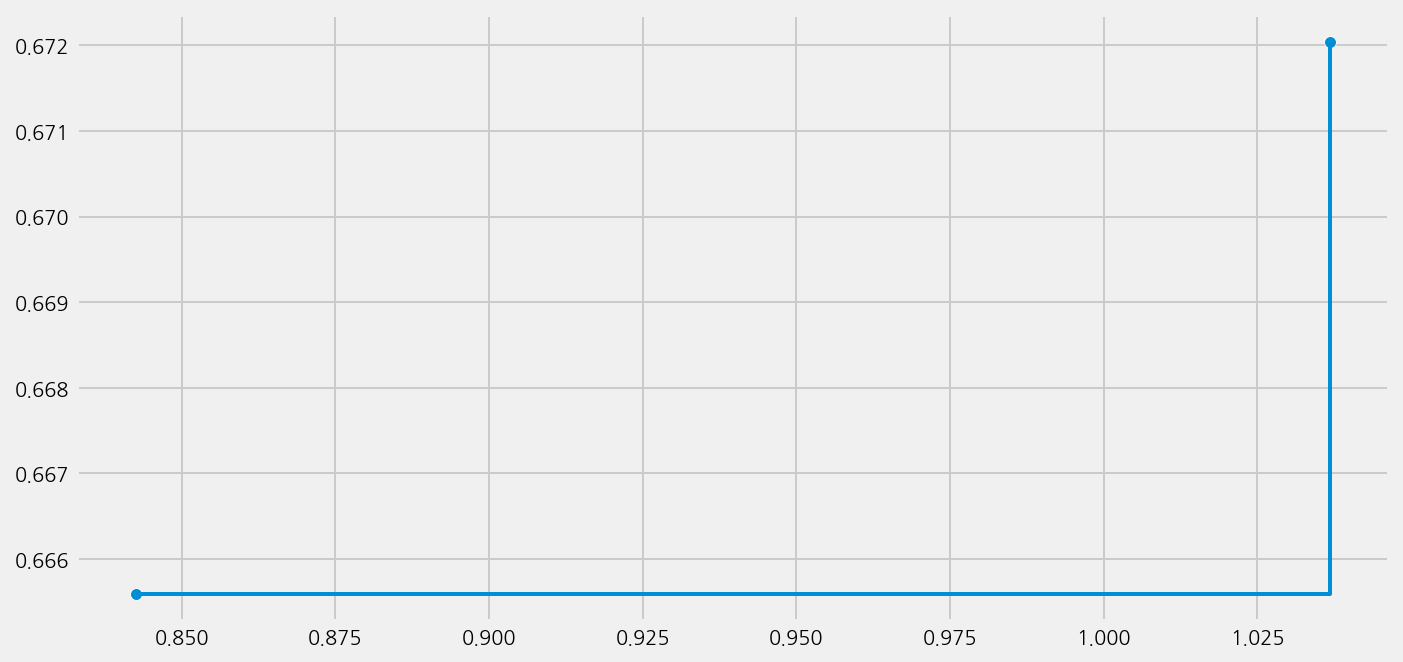

In [27]:
model.plot_learning_curve()

INFO:ekorpkit.datasets.base:Loaded info file: ../data/fomc/fomc_features_small/info-fomc_features_small.yaml
INFO:ekorpkit.io.file:Processing [1] files from ['fomc_features_small-train.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_features_small/fomc_features_small-train.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_features_small/fomc_features_small-train.parquet
INFO:ekorpkit.info.column:index: index, index of data: index, columns: ['date', 'target', 'prev_decision', 'GDP_diff_prev', 'PMI', 'EMP_diff_prev', 'RSALES_diff_year', 'UNEMP_diff_prev', 'HSALES_diff_year', 'Inertia_diff', 'Balanced_diff', 'split'], id: ['date', 'split']
INFO:ekorpkit.info.column:Added a column [split] with value [train]
INFO:ekorpkit.io.file:Processing [1] files from ['fomc_features_small-test.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_features_small/fomc_features_small-test.parquet']
INFO:ekorpkit.io.file:Loading data f

r2: -0.3066542577943232
mse: 0.7788461538461539
mae: 0.47115384615384615
Accuracy:  0.6826923076923077
Precison:  0.6514423076923077
Recall:  0.6826923076923077
F1 Score:  0.6251761059453366
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

         Cut       0.62      0.28      0.38        18
        Hike       0.50      0.12      0.19        17
        Hold       0.70      0.93      0.80        69

    accuracy                           0.68       104
   macro avg       0.61      0.44      0.46       104
weighted avg       0.65      0.68      0.63       104



INFO:ekorpkit.visualize.base:Saved figure to /workspace/projects/esgml/outputs/automl_fomc_features_small/confusion_matrix.png


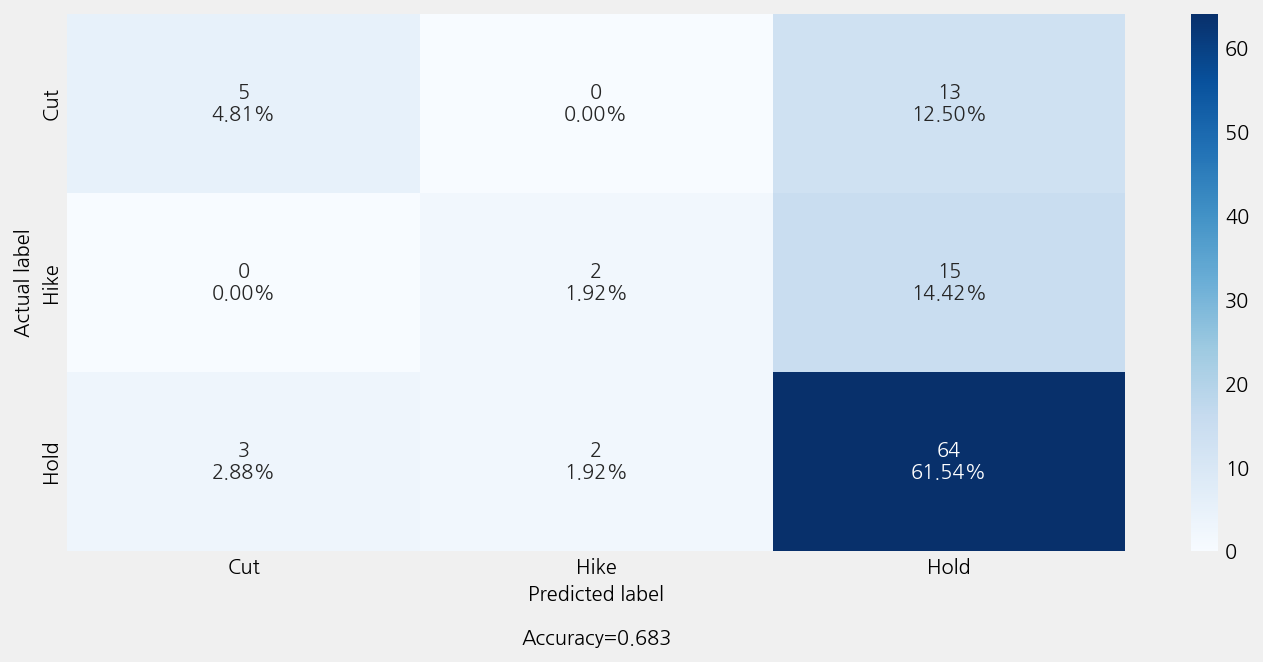

In [31]:
model.eval()

INFO:ekorpkit.visualize.plot:Plotting barplot with {'x': 'importances', 'y': 'columns', 'hue': None}
INFO:ekorpkit.visualize.base:Saved figure to /workspace/projects/esgml/outputs/automl_fomc_features_small/fig_automl_fomc_features_small_feature_importance.png


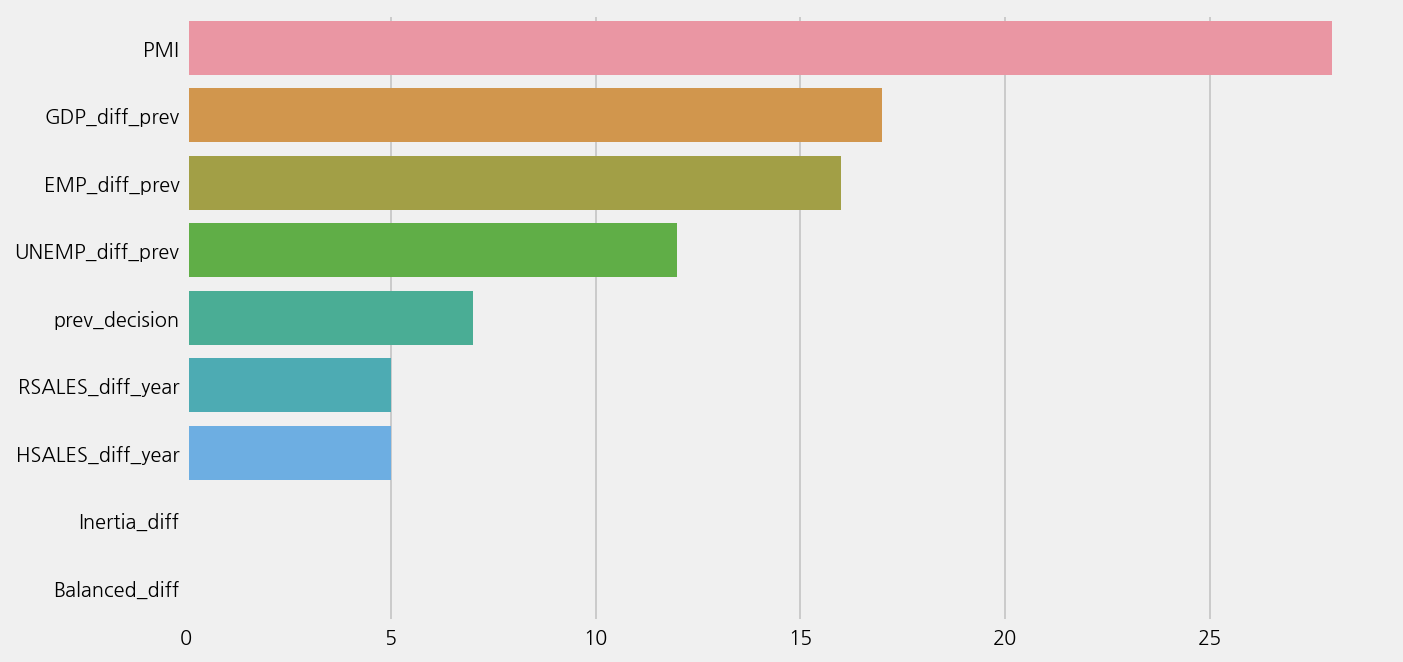

In [34]:
model.plot_feature_importance()

In [33]:
model.get_feature_importance()

,columns,importances
2,PMI,28
1,GDP_diff_prev,17
3,EMP_diff_prev,16
5,UNEMP_diff_prev,12
0,prev_decision,7
4,RSALES_diff_year,5
6,HSALES_diff_year,5
7,Inertia_diff,0
8,Balanced_diff,0
